In [0]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Read in Images

In [0]:
#get list of file names for pneumonia images from training set
file_names_pneumonia = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA')

#initilize list of images
pneumonia_image_list = []
pneumonia_file_path = []
pneumonia_list = []

for i in file_names_pneumonia:
    #concat filepath with file name
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA/' + i
    #append images from filepath
    pneumonia_image_list.append(plt.imread(temp_path))
    #append filepath
    pneumonia_file_path.append(temp_path)
    #label the image as pneumonia
    pneumonia_list.append('pneumonia')

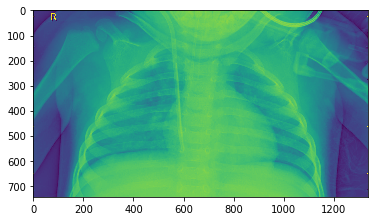

In [4]:
#show image
plt.imshow(pneumonia_image_list[0])

In [0]:
#get list of file names for normal images from training set
file_names_normal = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL')

#initialize lists
normal_image_list = []
normal_file_path = []
normal_list = []

for i in file_names_normal:
    #create filepath for every image filename
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL/' + i
    
    #append images to image list
    normal_image_list.append(plt.imread(temp_path))

    #append filepath
    normal_file_path.append(temp_path)

    normal_list.append('normal')

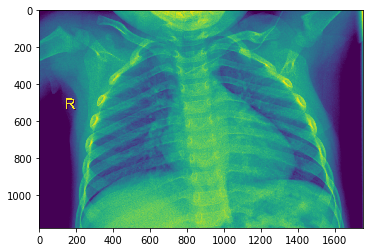

In [6]:
#show normal image
plt.imshow(normal_image_list[0])

In [0]:
#combine the normal and pneumonia lists
image_list = pneumonia_image_list + normal_image_list
file_path_list = pneumonia_file_path + normal_file_path
condition_list = pneumonia_list + normal_list

#create a dataframe from the lists
df = pd.DataFrame({'image':image_list, 'file_path': file_path_list, 'condition':condition_list})

In [0]:
#define function for labeling normal and pneumonia images as 0 and 1 respectively
def labels(condition):
  if condition == 'normal':
    result = 0
  elif condition == 'pneumonia':
    result = 1
  return result

#create label column using labels function
df['label'] = df['condition'].apply(labels)

In [9]:
df.head()

,image,file_path,condition,label
0,"[[40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
1,"[[7, 7, 8, 9, 9, 10, 11, 11, 11, 11, 11, 12, 1...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
2,"[[13, 13, 13, 12, 12, 11, 11, 11, 16, 14, 12, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
3,"[[166, 162, 161, 163, 164, 162, 164, 168, 165,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1


In [0]:
#save the dataframe as a csv
df_train = df[['file_path', 'condition', 'label']]
df_train.to_csv('/content/gdrive/My Drive/Capstone Project 2/train.csv', index = False)

In [0]:
#repeat process for test data
#get list of file names for pneumonia images from training set
file_names_pneumonia_test = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/PNEUMONIA')

#initilize list of images
pneumonia_image_list_test = []
pneumonia_file_path_test = []
pneumonia_list_test = []

for i in file_names_pneumonia_test:
    #concat filepath with file name
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/PNEUMONIA/' + i
    #append filepath to image list
    pneumonia_image_list_test.append(plt.imread(temp_path))
    pneumonia_file_path_test.append(temp_path)
    #label the image as pneumonia
    pneumonia_list_test.append('pneumonia')

#get list of file names for normal images from training set
file_names_normal_test = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/NORMAL')

#initialize lists
normal_image_list_test = []
normal_file_path_test = []
normal_list_test = []

for i in file_names_normal_test:
    #create filepath for every image filename
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/NORMAL/' + i
    
    #append filepath to image list
    normal_image_list_test.append(plt.imread(temp_path))
    normal_file_path_test.append(temp_path)
    normal_list_test.append('normal')

#combine the normal and pneumonia lists
image_list_test = pneumonia_image_list_test + normal_image_list_test
file_path_test = pneumonia_file_path_test + normal_file_path_test
condition_list_test = pneumonia_list_test + normal_list_test

#create a dataframe from the lists
df_test = pd.DataFrame({'file_path':file_path_test, 'condition':condition_list_test})
df_test['label'] = df_test['condition'].apply(labels)

In [0]:
df_test.to_csv('/content/gdrive/My Drive/Capstone Project 2/test.csv', index = False)

In [0]:
#get the number of rows in image
def get_x(image):
  return image.shape[0]

#get number of columns in image
def get_y(image):
  return image.shape[1]

In [0]:
#create columns for rows of an image
df['rows'] = df.image.apply(get_x)

#create columns for columns of an image
df['columns'] = df.image.apply(get_y)

#create columns for image aspect ratio
df['aspect_ratio'] = df['columns'] / df['rows']

In [15]:
df.head()

,image,file_path,condition,label,rows,columns,aspect_ratio
0,"[[40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,744,1336,1.795699
1,"[[7, 7, 8, 9, 9, 10, 11, 11, 11, 11, 11, 12, 1...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,776,1168,1.505155
2,"[[13, 13, 13, 12, 12, 11, 11, 11, 16, 14, 12, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,664,984,1.481928
3,"[[166, 162, 161, 163, 164, 162, 164, 168, 165,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,979,1348,1.376915
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,872,1328,1.522936


# Explore Data

Plot the rows vs columns to get a better idea of the average aspect ratios across the images.

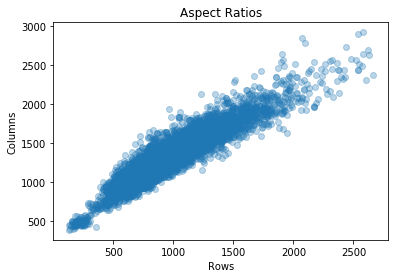

Mean Rows:  968.07
Mean Columns:  1320.61
Mean Aspect Ratio:  1.44


In [16]:
plt.scatter(df['rows'], df['columns'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(df['rows']),2))
print('Mean Columns: ', round(np.mean(df['columns']),2))
print('Mean Aspect Ratio: ', round(np.mean(df.aspect_ratio),2))

Create a plot to compare the number of pneumonia and normal cases in our data set.  We can see that there is a slight imbalance, suggesting we may need to use metrics other that accuracy to evaluate our model.

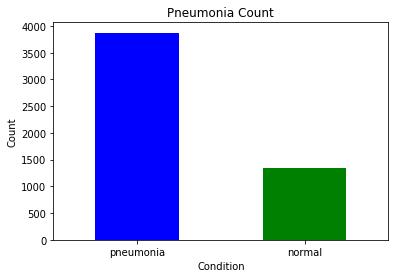

In [17]:
df.condition.value_counts().plot(kind = 'bar', color = ['b', 'g'])
plt.title('Pneumonia Count')
plt.xlabel('Condition')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

# Using OpenCV for Image Processing

In [0]:
import cv2 as cv

In [0]:
def auto_canny(image, sigma = 0.33):
  #compute the median
  image_median = np.median(image)

  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * image_median))
  upper = int(min(255, (1.0 + sigma) * image_median))
  edged = cv.Canny(image, lower, upper)
  return edged

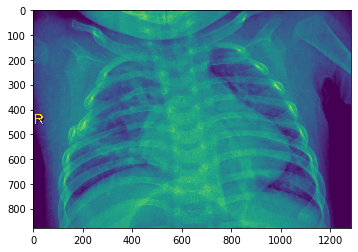

In [20]:
img = df.loc[20,'image']
plt.imshow(img)

Text(0.5, 1.0, 'Edge Detection')

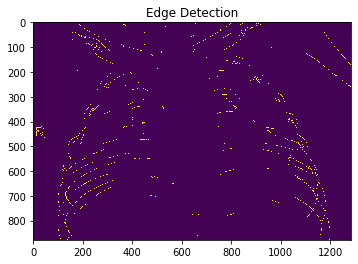

In [21]:
plt.imshow(auto_canny(img))
plt.title('Edge Detection')

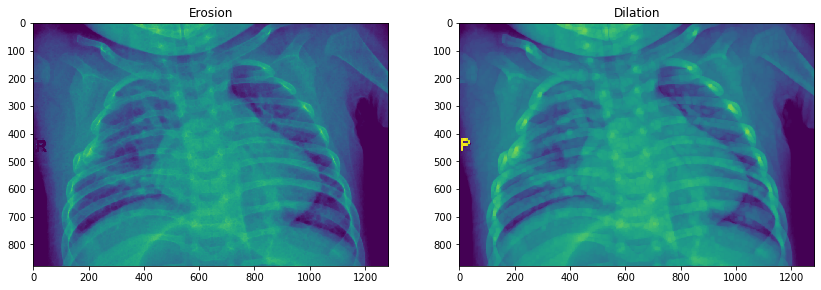

In [22]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(erosion, kernel, iterations = 2)

plt.figure(figsize = (14,20))
plt.subplot(1,2,1)
plt.title('Erosion')
plt.imshow(erosion)
plt.subplot(1,2,2)
plt.title('Dilation')
plt.imshow(dilation)
plt.show()

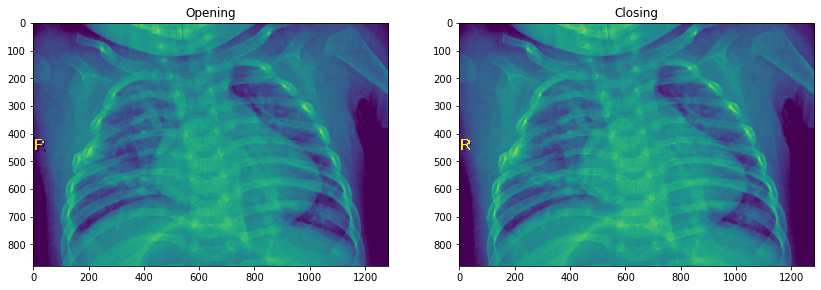

In [23]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize = (14,20))
plt.subplot(1,2,1)
plt.title('Opening')
plt.imshow(opening)
plt.subplot(1,2,2)
plt.title('Closing')
plt.imshow(closing)
plt.show()

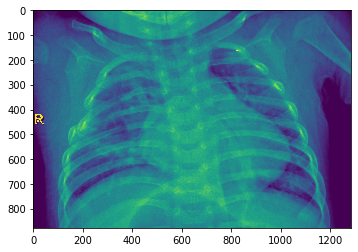

(<matplotlib.image.AxesImage at 0x7f15082d4f28>, None)

In [24]:
corners = cv.goodFeaturesToTrack(img,25,0.01,10)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()